In [1]:
t0_utc="2020-01-28T06:43:20.640"
t1_rel_days=-0.76
t2_rel_days=0

In [2]:
source_name="ZTF20aajnksq"
source_ra=191.770292 
source_dec=45.200626


In [3]:
import integralclient as ic

unable to get logstash entrypoint from method env exception: entrypoint is None or empty


In [52]:
%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
import os

In [5]:
t0_ijd = float(ic.converttime("UTC", t0_utc, "IJD"))

url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-28T06:43:20.640/IJD


In [6]:
t1_ijd = t0_ijd+t1_rel_days
t2_ijd = t0_ijd+t2_rel_days

In [7]:
[ic.converttime("IJD", t1_ijd, "UTC"), ic.converttime("IJD", t0_ijd, "UTC"), ic.converttime("IJD", t2_ijd, "UTC")]


url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7331.5209007407402169/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.2809007407404351/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.2809007407404351/UTC


['2020-01-27T12:28:56.639',
 '2020-01-28T06:43:20.639',
 '2020-01-28T06:43:20.639']

In [8]:
r1,r0,r2=map(int,[ic.converttime("IJD", t1_ijd, "REVNUM"), ic.converttime("IJD", t0_ijd, "REVNUM"), ic.converttime("IJD", t2_ijd, "REVNUM")])
r1,r0,r2

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7331.5209007407402169/REVNUM
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.2809007407404351/REVNUM
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.2809007407404351/REVNUM


(2187, 2187, 2187)

In [9]:
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
import numpy as np

In [10]:
atts=[]
for rev in range(r1-1,r2+1): 
    print(rev)
    f=fits.open("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/%4i.000/attitude_historic.fits"%rev)
    #f=fits.open("/mnt/sshfs/isdc-in01/isdc/arc/rev_3/aux/adp/%4i.001/attitude_historic.fits.gz"%rev)
    atts.append(f[1].data)
att=np.hstack(atts)
att

2186
2187


array([(b'21860000', b'P', b'P', 0, 7327.185685  , 7327.185685  , 7327.185685  , 13866.78, 0., 199.16087, -29.796333, 302.06845, -21.31075  , b'            ',  0.     ,  0.      ,  92.9, 0, nan,        nan,        nan),
       (b'21860001', b'O', b'M', 0, 7327.34617111, 7327.36218963, 7327.34780306,     0.  , 0., 198.90596, -32.624863, 302.67166, -20.391111 , b'            ',  0.     ,  0.      ,  69.5, 0, nan,        nan,        nan),
       (b'21860001', b'O', b'M', 1, 7327.34617111, 7327.36218963, 7327.34834704,     0.  , 0., 198.74033, -34.798805, 303.21225, -19.777695 , b'            ',  0.     ,  0.      ,  69.5, 0, nan,        nan,        nan),
       ...,
       (b'21870065', b'P', b'G', 0, 7332.28606694, 7332.29819657, 7332.29819657,   784.  , 0.,  71.01488,  50.09375 , 331.74295,   7.6741943, b'3351-01507-1', 70.83992, 49.973694, 123.8, 0, nan,  0.014865 ,  0.0937374),
       (b'21870066', b'S', b'M', 0, 7332.30727065, 7332.30921509, 7332.30921509,     0.  , 0.,  70.99958,  5

In [13]:
ds = []
for lfn in open("/data/reduced/ddcache/global/BurstSearch/ZTF20aajnksq/v0/index.txt"):
    print("?",lfn)
    fn=lfn.strip().split()[-1]
    print(lfn,fn)
    d=pd.read_csv(fn)
    ds.append(d)        
    print(len(d.columns),np.min(d['Classification.burst_data.time'])-t0_ijd,np.max(d['Classification.burst_data.time'])-t0_ijd)
        
d=pd.concat(ds).reset_index()
print(np.min(d['Classification.burst_data.time'])-t0_ijd,np.max(d['Classification.burst_data.time'])-t0_ijd)

? /data/reduced/ddcache/byrev/2186/ReduceBursts.v1/00258968/burst_results.txt.gz

/data/reduced/ddcache/byrev/2186/ReduceBursts.v1/00258968/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2186/ReduceBursts.v1/00258968/burst_results.txt.gz
440 -4.770759119185641 -2.738326819773647
? /data/reduced/ddcache/byrev/2187/ReduceBursts.v1/ca76b53d/burst_results.txt.gz

/data/reduced/ddcache/byrev/2187/ReduceBursts.v1/ca76b53d/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2187/ReduceBursts.v1/ca76b53d/burst_results.txt.gz
440 -2.092645304177495 -0.0494461344615047
? /data/reduced/ddcache/byrev/2188/ReduceBursts.v1/0132fa43/burst_results.txt.gz

/data/reduced/ddcache/byrev/2188/ReduceBursts.v1/0132fa43/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2188/ReduceBursts.v1/0132fa43/burst_results.txt.gz
440 0.5457731356727891 2.6125661145488266
-4.770759119185641 2.6125661145488266


In [14]:
r_times=[]
r_gaps=[]

end=None

for rev in range(r1-1,r2+2): 
    print(rev)
    i1, i2 = list(map(float,ic.converttime("REVNUM",rev,"IJD").split()[1:]))
    
    t=np.array(d['Classification.burst_data.time'])
    t=t[(t>i1) & (t<i2)]
    id1=min(t)
    id2=max(t)
    
    r_times.append([id1,id2])
    if end is not None:
        r_gaps.append((end,id1))
    end=id2

r_times
r_gaps

2186
url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2186/IJD
2187
url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2187/IJD
2188
url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2188/IJD


[(7329.542573920967, 7330.188255436563),
 (7332.231454606279, 7332.826673876413)]

In [15]:
import healpy as hp

<IPython.core.display.Javascript object>


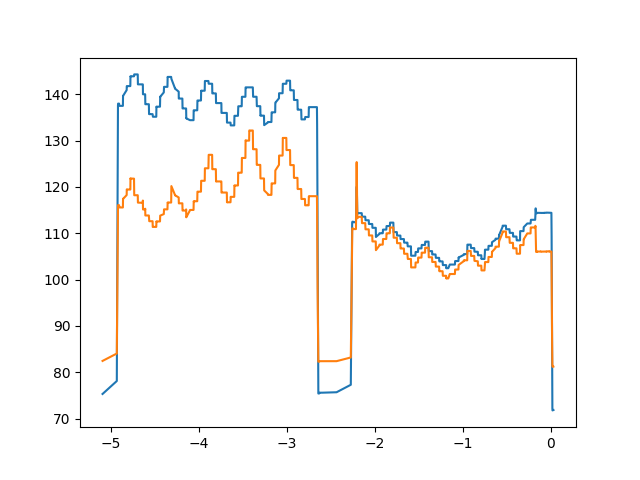

In [17]:
scx=SkyCoord(att['RA_SCX'],att['DEC_SCX'],unit="deg")
scz=SkyCoord(att['RA_SCZ'],att['DEC_SCZ'],unit="deg")

source=SkyCoord(source_ra, source_dec, unit="deg")
scx.separation(source).deg






source_on_scx = source.cartesian.x.value*scx.cartesian.x.value + \
source.cartesian.y.value*scx.cartesian.y.value + \
source.cartesian.z.value*scx.cartesian.z.value

source_in_zy = np.array([scx.cartesian.x - source.cartesian.x*source_on_scx, \
               scx.cartesian.y - source.cartesian.y*source_on_scx, \
               scx.cartesian.z - source.cartesian.z*source_on_scx])

source_in_zy/=np.sum(source_in_zy**2,0)


source_on_z_in_zy = source_in_zy[0]*scz.cartesian.x.value + \
source_in_zy[1]*scz.cartesian.y.value + \
source_in_zy[2]*scz.cartesian.z.value

source_theta_deg = np.arccos(source_on_scx)/np.pi*180
source_phi_deg = np.arccos(source_on_z_in_zy)/np.pi*180



plt.figure()

#plt.plot(
#        att['TIME']-t0_ijd,
#        scx.separation(source).deg
#    )

#plt.plot(
#        att['TIME']-t0_ijd,
#        scz.separation(source).deg
#    )

plt.plot(
        att['TIME']-t0_ijd,
        source_theta_deg,
    )

plt.plot(
        att['TIME']-t0_ijd,
        source_phi_deg,
    )

<IPython.core.display.Javascript object>


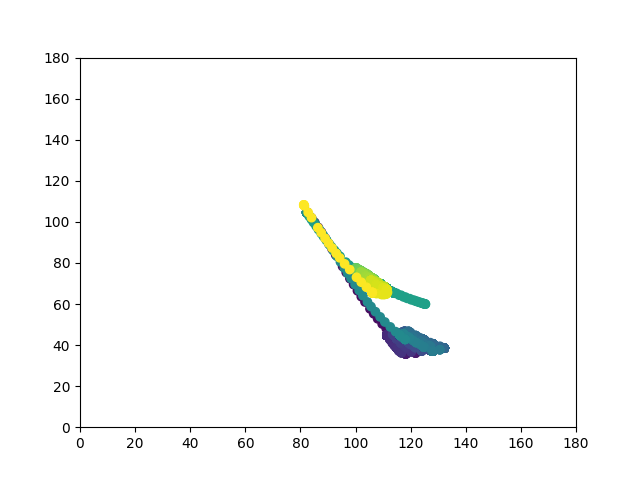

(0, 180)

In [18]:
f=plt.figure()

plt.scatter(
        source_phi_deg,
        180-source_theta_deg,
        c=att['TIME']-t0_ijd
)

plt.xlim([0,180])
plt.ylim([0,180])


In [19]:
for c in d.columns:
    print(c)
    


index
Unnamed: 0
BackgroundStability._da_stored_link_input_burst
BackgroundStability._da_stored_link_input_lcdata
BackgroundStability.abstract
BackgroundStability.allow_alias
BackgroundStability.allow_timespent_adjustment
BackgroundStability.byscale.0.05.bkg_after_start
BackgroundStability.byscale.0.05.bkg_after_stop
BackgroundStability.byscale.0.05.bkg_before_start
BackgroundStability.byscale.0.05.bkg_before_stop
BackgroundStability.byscale.0.05.bkg_excvar
BackgroundStability.byscale.0.05.bkg_mean
BackgroundStability.byscale.0.05.bkg_std
BackgroundStability.byscale.0.15.bkg_after_start
BackgroundStability.byscale.0.15.bkg_after_stop
BackgroundStability.byscale.0.15.bkg_before_start
BackgroundStability.byscale.0.15.bkg_before_stop
BackgroundStability.byscale.0.15.bkg_excvar
BackgroundStability.byscale.0.15.bkg_mean
BackgroundStability.byscale.0.15.bkg_std
BackgroundStability.byscale.0.35.bkg_after_start
BackgroundStability.byscale.0.35.bkg_after_stop
BackgroundStability.byscale.0.35.bk

In [149]:
d['Classification.burst_data.svnrev']

0      e4c70b2
1      e4c70b2
2      e4c70b2
3      e4c70b2
4      e4c70b2
        ...   
206    e4c70b2
207    e4c70b2
208    e4c70b2
209    e4c70b2
210    e4c70b2
Name: Classification.burst_data.svnrev, Length: 211, dtype: object

<IPython.core.display.Javascript object>


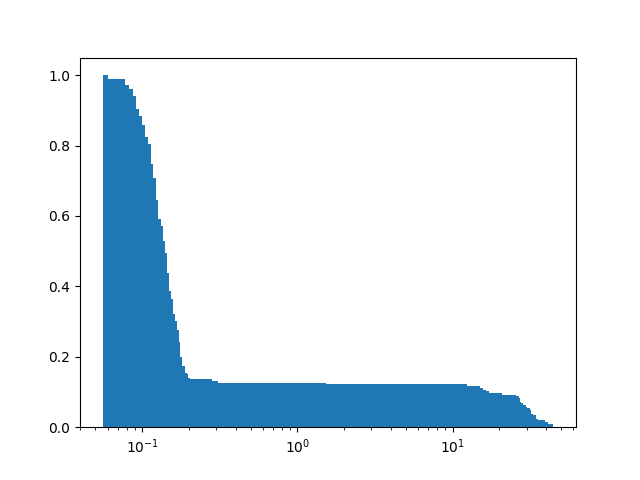

--- Logging error ---
Traceback (most recent call last):
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/logging/__init__.py", line 998, in emit
    self.flush()
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/logging/__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 5] Input/output error
Call stack:
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/savchenk/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 563, in start
 

17.911385747776734

In [20]:
plt.figure()

plt.hist(d["BackgroundStability.byscale.2.7.bkg_excvar"]-1,10000,cumulative=-1,normed=True)
plt.semilogx()


np.nanpercentile(d["BackgroundStability.byscale.2.7.bkg_excvar"],90)

In [30]:

known_grbs=[dict(zip(["name", "utc", "ra", "dec"], r)) for r in [
    ("GRB 200125A", "2020-01-25T11:31:39",228.047, -8.148),        
    ("GRB 200127X", "2020-01-27T16:50:38",None,None),
    ("GRB 200127Y", "2020-01-27T23:52:39",None,None),
    ("GRB 200127A", "2020-01-27T14:44:31",295.204,44.910),
    ("GRB 200127B", "2020-01-27T18:11:18",75.9,20.1),
    ("GRB 200128A", "2020-01-28T03:40:05",158.6,41.6),
    ("GRB 200128B", "2020-01-28T12:23:29.98",None,None),
    ("GRB 200129A", "2020-01-29T09:48:44",346.3,-45.0),
    ("GRB 200130A", "2020-01-30T05:57:16",329.3,-65.9),
    ("GRB 200130B", "2020-01-30T09:59:59.282",137.5,-51.3),
]]

for g in known_grbs:
    g['ijd'] = float(ic.converttime("UTC",g['utc'],"IJD"))

known_grbs

url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-25T11:31:39/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-27T16:50:38/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-27T23:52:39/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-27T14:44:31/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-27T18:11:18/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-28T03:40:05/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-28T12:23:29.98/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-29T09:48:44/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-30T05:57:16/IJD
url http://cdcihn/timesystem/api/v1.0/converttime/UTC/2020-01-30T09:59:59.282/IJD


[{'name': 'GRB 200125A',
  'utc': '2020-01-25T11:31:39',
  'ra': 228.047,
  'dec': -8.148,
  'ijd': 7329.48111324074},
 {'name': 'GRB 200127X',
  'utc': '2020-01-27T16:50:38',
  'ra': None,
  'dec': None,
  'ijd': 7331.702629444444},
 {'name': 'GRB 200127Y',
  'utc': '2020-01-27T23:52:39',
  'ra': None,
  'dec': None,
  'ijd': 7331.995696574074},
 {'name': 'GRB 200127A',
  'utc': '2020-01-27T14:44:31',
  'ra': 295.204,
  'dec': 44.91,
  'ijd': 7331.615048425926},
 {'name': 'GRB 200127B',
  'utc': '2020-01-27T18:11:18',
  'ra': 75.9,
  'dec': 20.1,
  'ijd': 7331.758647962963},
 {'name': 'GRB 200128A',
  'utc': '2020-01-28T03:40:05',
  'ra': 158.6,
  'dec': 41.6,
  'ijd': 7332.153636388889},
 {'name': 'GRB 200128B',
  'utc': '2020-01-28T12:23:29.98',
  'ra': None,
  'dec': None,
  'ijd': 7332.517119953704},
 {'name': 'GRB 200129A',
  'utc': '2020-01-29T09:48:44',
  'ra': 346.3,
  'dec': -45.0,
  'ijd': 7333.409643333333},
 {'name': 'GRB 200130A',
  'utc': '2020-01-30T05:57:16',
  'ra': 3

<IPython.core.display.Javascript object>


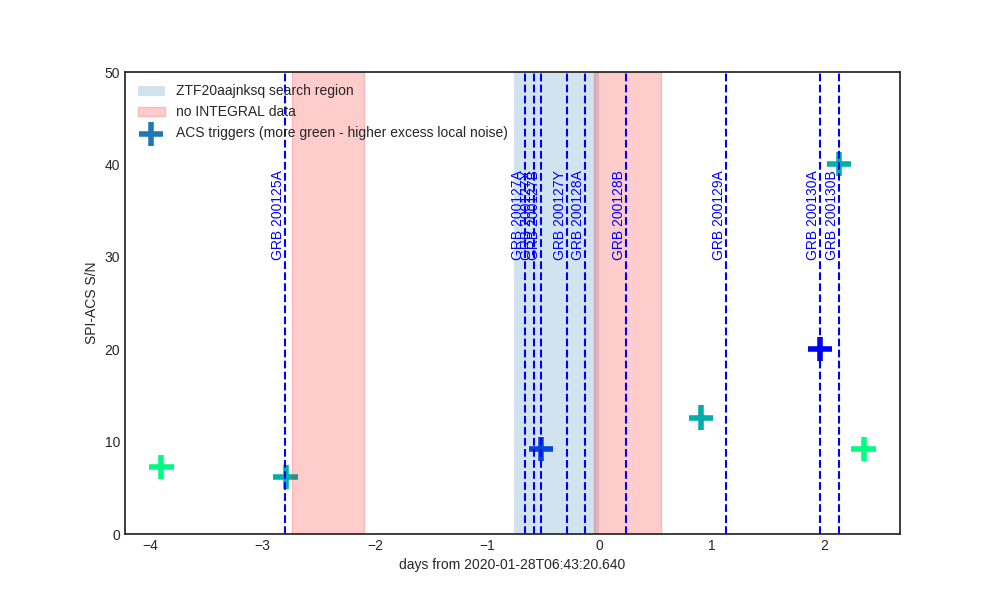

Text(0, 0.5, 'SPI-ACS S/N')

In [31]:
mpl.style.use('seaborn-white')

plt.figure(figsize=(10,6))



m=d["BackgroundStability.byscale.2.7.bkg_excvar"]<1.5 #np.nanpercentile(d["BackgroundStability.byscale.2.7.bkg_excvar"],50)


m&=(d["Durations.durations.spikeprob"]<0.1) #| (d["Classification.burst_data.len_clean"]>5./24/3600)
#m&=(d["SpikeLike.spikeresults.spikeprob"]<0.1) | (d["Durations.durations.duration"]>5./24/3600)


#m&=d["Classification.burst_data.time"]>t0_ijd-0.76
#m&=d["Classification.burst_data.time"]<t0_ijd

m&=d["Classification.burst_data.maxsig"]>6
m&=d['Classification.burst_data.maxsig_r']>=0

if False:
    plt.scatter(
    d['Classification.burst_data.time']- t0_ijd, 
    d['Classification.burst_data.maxsig'],
    alpha=0.05
)

plt.scatter(
    d['Classification.burst_data.time'][m] - t0_ijd, 
    d['Classification.burst_data.maxsig'][m],
    c=d["BackgroundStability.byscale.2.7.bkg_std"][m],
    cmap="winter",
    label="ACS triggers (more green - higher excess local noise)",
    marker='+',
    s=300,
    lw=4,
)

plt.xlabel("days from %s"%t0_utc)

#label="known GRB"
label=None
for grb in known_grbs:
    plt.axvline(grb['ijd']-t0_ijd,label=label,c='b',ls='--')
    plt.text(
                grb['ijd']-t0_ijd,30,
                grb['name'],
                rotation="vertical",
                ha="right",
                c='b',
    )
    label=None
    
plt.axvspan(-0.76,0,alpha=0.2,label="ZTF20aajnksq search region")

label="no INTEGRAL data"
for r_g1, r_g2 in r_gaps:
    plt.axvspan(r_g1-t0_ijd,r_g2-t0_ijd,color="r",alpha=0.2,label=label)    
    label=None
    
plt.ylim([0,50])

plt.legend()
plt.ylabel("SPI-ACS S/N")
    
#plt.axvline(tt1-t0_ijd)

In [32]:
t=d['Classification.burst_data.time']
i=np.abs(t-7328).idxmin()
t.iloc[i]
r=d.iloc[i]

In [33]:
for grb in known_grbs:
    print()
    print(grb)
    print("BTI")
    
    dist=np.abs(d['Classification.burst_data.time']-grb['ijd'])*24*3600
    nearest=dist.idxmin()
    
    print("nearest at",nearest,dist.loc[nearest])
    
    if dist.loc[nearest]>200:
        print("no counterpart")
        continue
    
    b1=d.iloc[nearest]
        
    for c in d.columns:
        if any([
            a in c for a in ["BackgroundStability.byscale.2.7.bkg_excvar","Durations.durations.d","spikeprob"]
        ]):
            print("%50s: %.20s"%(c,b1[c]))
    


{'name': 'GRB 200125A', 'utc': '2020-01-25T11:31:39', 'ra': 228.047, 'dec': -8.148, 'ijd': 7329.48111324074}
BTI
nearest at 69 289.6498943766346
no counterpart

{'name': 'GRB 200127X', 'utc': '2020-01-27T16:50:38', 'ra': None, 'dec': None, 'ijd': 7331.702629444444}
BTI
nearest at 110 953.2503070717212
no counterpart

{'name': 'GRB 200127Y', 'utc': '2020-01-27T23:52:39', 'ra': None, 'dec': None, 'ijd': 7331.995696574074}
BTI
nearest at 119 1406.5763082762714
no counterpart

{'name': 'GRB 200127A', 'utc': '2020-01-27T14:44:31', 'ra': 295.204, 'dec': 44.91, 'ijd': 7331.615048425926}
BTI
nearest at 109 1781.808528318652
no counterpart

{'name': 'GRB 200127B', 'utc': '2020-01-27T18:11:18', 'ra': 75.9, 'dec': 20.1, 'ijd': 7331.758647962963}
BTI
nearest at 112 17.25534278084524
        BackgroundStability.byscale.2.7.bkg_excvar: 1.0852085407570442
                      Durations.durations.duration: 10.950012900866568
                  Durations.durations.duration_err: 4.348706704297268
     

In [34]:
for grb in known_grbs:
    print(grb)
    print("BTI?")


{'name': 'GRB 200125A', 'utc': '2020-01-25T11:31:39', 'ra': 228.047, 'dec': -8.148, 'ijd': 7329.48111324074}
BTI?
{'name': 'GRB 200127X', 'utc': '2020-01-27T16:50:38', 'ra': None, 'dec': None, 'ijd': 7331.702629444444}
BTI?
{'name': 'GRB 200127Y', 'utc': '2020-01-27T23:52:39', 'ra': None, 'dec': None, 'ijd': 7331.995696574074}
BTI?
{'name': 'GRB 200127A', 'utc': '2020-01-27T14:44:31', 'ra': 295.204, 'dec': 44.91, 'ijd': 7331.615048425926}
BTI?
{'name': 'GRB 200127B', 'utc': '2020-01-27T18:11:18', 'ra': 75.9, 'dec': 20.1, 'ijd': 7331.758647962963}
BTI?
{'name': 'GRB 200128A', 'utc': '2020-01-28T03:40:05', 'ra': 158.6, 'dec': 41.6, 'ijd': 7332.153636388889}
BTI?
{'name': 'GRB 200128B', 'utc': '2020-01-28T12:23:29.98', 'ra': None, 'dec': None, 'ijd': 7332.517119953704}
BTI?
{'name': 'GRB 200129A', 'utc': '2020-01-29T09:48:44', 'ra': 346.3, 'dec': -45.0, 'ijd': 7333.409643333333}
BTI?
{'name': 'GRB 200130A', 'utc': '2020-01-30T05:57:16', 'ra': 329.3, 'dec': -65.9, 'ijd': 7334.248902592592}

In [ ]:
# query oda for coincidences

In [36]:
import datetime
import glob

def utc2path(utc):
    utc_date=datetime.datetime.strptime(utc, "%Y-%m-%dT%H:%M:%S.%f")
    
    r = "/byburst/byyear/"
    r += "/%.4i" % utc_date.year
    r += "/%.4i-%.2i" % (utc_date.year,utc_date.month)
    r += "/%.4i-%.2i-%.2i" % (utc_date.year,utc_date.month,utc_date.day)
    r += "/%s" % utc.replace(":","-")
    r += "/" 
    return r

#utc2path(utc)

In [38]:
def get_assoc(t0, limit=100):
    print(ic.converttime("IJD", t0, "UTC"))
    
    associations=[]
    for g in known_grbs:
        dist_s=(t0-g['ijd'])*24*3600
        if abs(dist_s)<limit:
            print(dist_s)
            associations.append(g)
            
    return associations
                
get_assoc(7334.24911,100)

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.2491099999997459/UTC
2020-01-30T05:57:33.919
17.920000068261288


[{'name': 'GRB 200130A',
  'utc': '2020-01-30T05:57:16',
  'ra': 329.3,
  'dec': -65.9,
  'ijd': 7334.248902592592}]

In [39]:
resolutions=[1]+list(map(int,open("resolutions.txt").readlines()))

def rebin(x,n,o=0,av=True):
    x=np.array(x)
    
    N=int(x.shape[0]/n)
  #  print(N)
    return x[:N*n].reshape((N,n)).mean(1)

def plot(lcb, t0, len_s, basescales, extrascales, span_s):
    plt.figure()
    
    assoc=get_assoc(t0)
    
    if len(assoc)>0:
        plt.title("aka "+", ".join([a['name'] for a in assoc]))
    else:
        print("no associations for", t0)
    
    
    scales=basescales+extrascales

    if min(basescales)<3:
        plt.plot(
            (lcb.t-t0)*24*3600, 
            lcb.c,
            alpha=0.1
    )

    bestymin=None
    bestymax=None
    
    for n in scales:
        nN=resolutions[n]
        
        s_c=rebin(lcb.c,nN)
        s_ce=rebin(lcb.ce,nN)/nN**0.5
        
        plt.errorbar(
            (rebin(lcb.t,nN)-t0)*24*3600, 
            s_c,
            s_ce,
            label="%.3lgs"%(nN*0.05)
        )
                
        newmax=np.max(s_c+s_ce*3)
        newmin=np.min(s_c-s_ce*3)
        
        if bestymax is None or newmax>bestymax:
            bestymax=newmax
        
        if bestymin is None or newmin<bestymin:
            bestymin=newmin
    
    plt.axvspan(0,len_s,alpha=0.1)
    plt.axvspan(
            0-resolutions[basescales[0]]*0.05,
            len_s+resolutions[basescales[1]]*0.05,
            alpha=0.1)
    
    plt.legend()
    
    plt.xlim([-span_s,span_s])
    plt.ylim([bestymin,bestymax])
    
    plt.xlabel("second since %s"%ic.converttime("IJD", t0, "UTC"))
    


In [49]:
for c in d.columns:
    if 'len' in c:
        print(c)

Classification.burst_data.elen
Classification.burst_data.len
Classification.burst_data.len_clean
MultiDetData.mlcdata.Unnamed: 0.1.1.on_length_s
MultiDetData.mlcdata.Unnamed: 0.1.on_length_s
MultiDetData.mlcdata.Unnamed: 0.on_length_s
MultiDetData.mlcdata.acs.on_length_s
MultiDetData.mlcdata.counts.on_length_s
MultiDetData.mlcdata.good.on_length_s
MultiDetData.mlcdata.ijd.on_length_s
MultiDetData.mlcdata.isgri_rate_200_600.on_length_s
MultiDetData.mlcdata.isgri_rate_25_80.on_length_s
MultiDetData.mlcdata.isgri_rate_80_200.on_length_s
MultiDetData.mlcdata.t_since_midnight.on_length_s
MultiDetData.mlcdata.t_since_ref.on_length_s
MultiDetData.mlcdata.veto.on_length_s



url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2186/IJD
2020-01-24T09:05:17.995 7328.3794812411425 0.15000146522652355 7.248086897429461 2186
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7327.185684999998557/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7329.8447822222224204/UTC
rev 2020-01-23T04:26:13.999 2020-01-25T20:15:20.000
Durations.durations.spikeprob 0.02342876392458341
SpikeLike.spikeresults.spikeprob 0.23124222969728106
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-24T09:05:17.995+3&submit=Submit
t90 0.0
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-24/2020-01-24T09-05-17.995//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7328.3794812411424573/UTC
2020-01-24T09:05:17.995


<IPython.core.display.Javascript object>


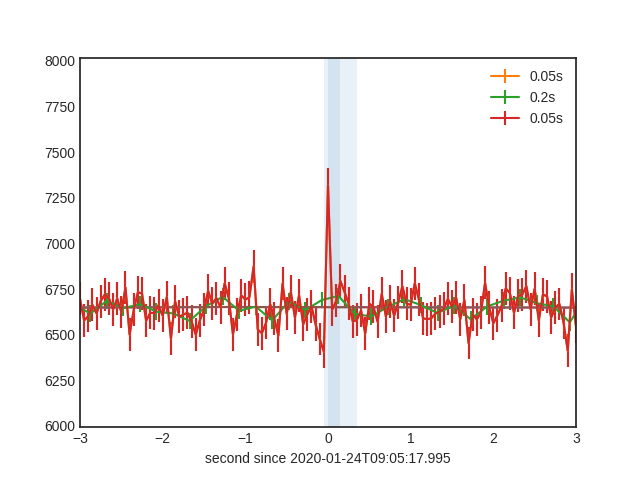

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7328.3794812411424573/UTC
2020-01-24T09:05:17.995
no associations for 7328.3794812411425
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7328.3794812411424573/UTC

url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2186/IJD
2020-01-25T11:36:28.649 7329.484465670073 3.8000011554686353 6.203808098335326 2186
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7327.185684999998557/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7329.8447822222224204/UTC
rev 2020-01-23T04:26:13.999 2020-01-25T20:15:20.000
Durations.durations.spikeprob 3.2935708132896726e-06
SpikeLike.spikeresults.spikeprob 0.7046848546716692
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-25T11:36:28.649+50.2&submit=Submit
t90 1.5750007689348422
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-25/2020-01-25T11-36-28.649//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0

<IPython.core.display.Javascript object>


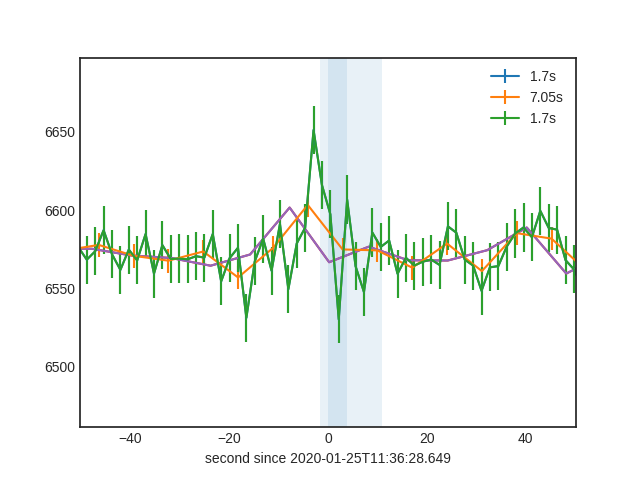

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7329.4844656700734049/UTC
2020-01-25T11:36:28.649
no associations for 7329.484465670073
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7329.4844656700734049/UTC

url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2187/IJD
2020-01-27T18:11:35.255 7331.758847677578 40.35003856988623 9.149340206971225 2187
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7329.8447822222224204/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.5044697222219838/UTC
rev 2020-01-25T20:15:20.000 2020-01-28T12:05:17.000
Durations.durations.spikeprob 6.9307550769723e-310
SpikeLike.spikeresults.spikeprob 0.3124902117709911
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-27T18:11:35.255+335&submit=Submit
t90 8.900008539785631
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-27/2020-01-27T18-11-35.255//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0/conv

<IPython.core.display.Javascript object>


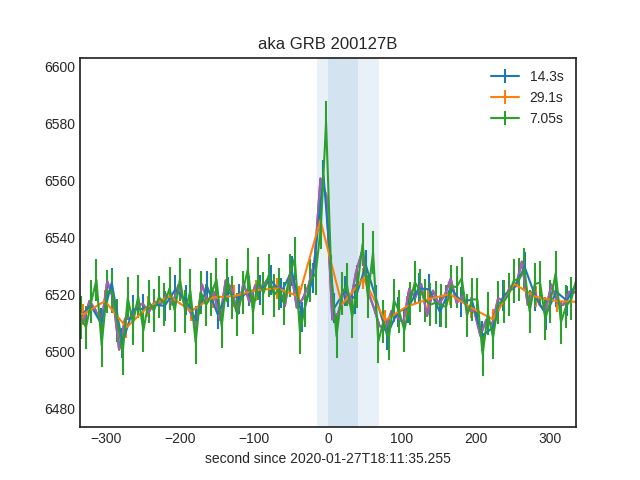

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7331.7588476775781601/UTC
2020-01-27T18:11:35.255
17.25534278084524
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7331.7588476775781601/UTC

url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2188/IJD
2020-01-29T04:22:53.516 7333.183364586935 114.60010362497997 12.606948853364699 2188
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.5044697222219838/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7335.1646317592585547/UTC
rev 2020-01-28T12:05:17.000 2020-01-31T03:55:54.999
Durations.durations.spikeprob 0.0
SpikeLike.spikeresults.spikeprob nan
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-29T04:22:53.516+691.2&submit=Submit
t90 69.5250615302939
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-29/2020-01-29T04-22-53.516//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7333.1833645869346583/UTC
2020-01-29T

<IPython.core.display.Javascript object>


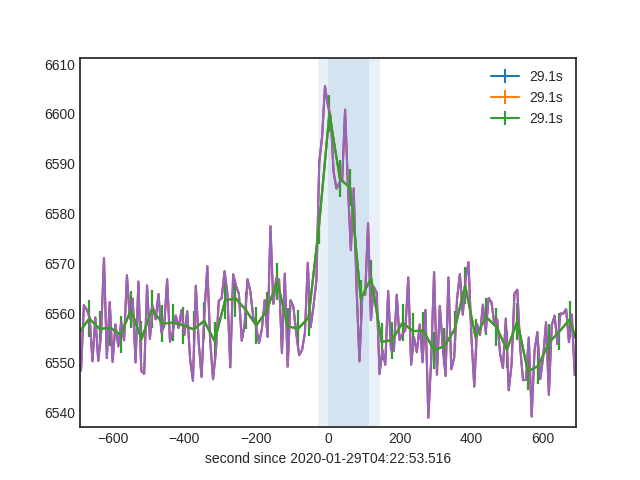

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7333.1833645869346583/UTC
2020-01-29T04:22:53.516
no associations for 7333.183364586935
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7333.1833645869346583/UTC

url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2188/IJD
2020-01-30T05:57:34.351 7334.249114989426 74.30006792710627 20.016517179870192 2188
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.5044697222219838/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7335.1646317592585547/UTC
rev 2020-01-28T12:05:17.000 2020-01-31T03:55:54.999
Durations.durations.spikeprob 6.9472962551097e-310
SpikeLike.spikeresults.spikeprob nan
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-30T05:57:34.351+530&submit=Submit
t90 33.22503218951169
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-30/2020-01-30T05-57-34.351//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/73

<IPython.core.display.Javascript object>


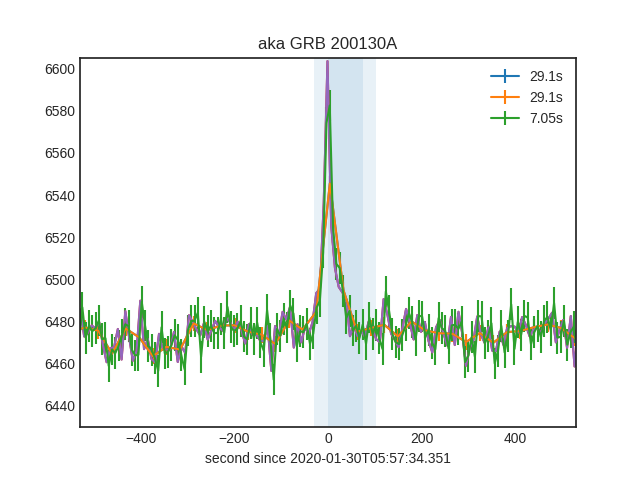

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.2491149894258342/UTC
2020-01-30T05:57:34.351
18.351086482289247
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.2491149894258342/UTC

url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2188/IJD
2020-01-30T09:59:58.614 7334.41745137477 60.80005793482998 40.03017469148596 2188
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.5044697222219838/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7335.1646317592585547/UTC
rev 2020-01-28T12:05:17.000 2020-01-31T03:55:54.999
Durations.durations.spikeprob 0.0
SpikeLike.spikeresults.spikeprob nan
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-30T09:59:58.614+476&submit=Submit
t90 10.525010687706525
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-30/2020-01-30T09-59-58.614//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.4174513747702804/UTC
2020-01-30T09

<IPython.core.display.Javascript object>


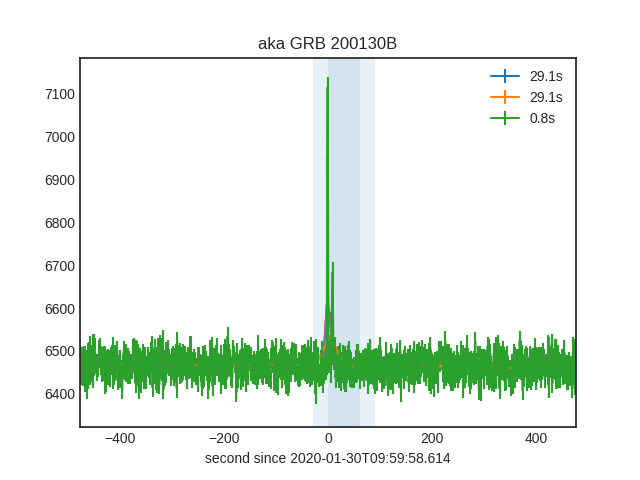

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.4174513747702804/UTC
2020-01-30T09:59:58.614
-0.6672197923762724
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.4174513747702804/UTC

url http://cdcihn/timesystem/api/v1.0/converttime/REVNUM/2188/IJD
2020-01-30T15:12:12.632 7334.634280279424 92.75008509575855 9.241055670797868 2188
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7332.5044697222219838/UTC
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7335.1646317592585547/UTC
rev 2020-01-28T12:05:17.000 2020-01-31T03:55:54.999
Durations.durations.spikeprob 6.9472962551097e-310
SpikeLike.spikeresults.spikeprob nan
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-01-30T15:12:12.632+603.8&submit=Submit
t90 58.55005289049586
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-01/2020-01-30/2020-01-30T15-12-12.632//LCData.v2*/*/output.txt.gz
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.63428027942427

<IPython.core.display.Javascript object>


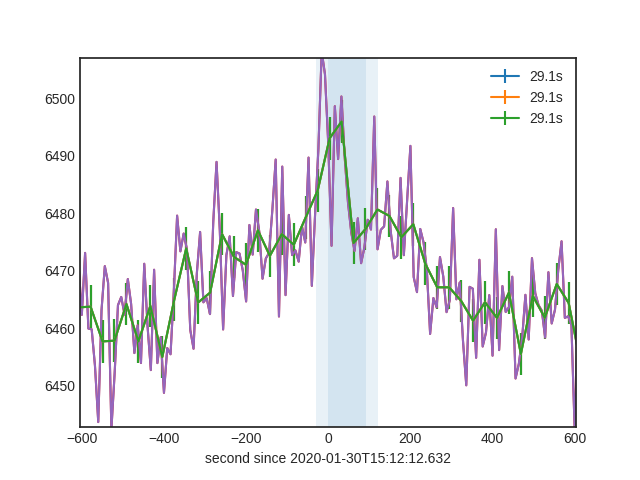

url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.6342802794242743/UTC
2020-01-30T15:12:12.632
no associations for 7334.634280279424
url http://cdcihn/timesystem/api/v1.0/converttime/IJD/7334.6342802794242743/UTC


In [166]:
summary=[]

for i,(I,r) in enumerate(d[m].iterrows()):
    
    r['len_s'] = r['Classification.burst_data.len_clean']*24*3600
    
    print("\n", "="*30)
    #if i!=32: continue

    grb={}
    summary.append(grb)
    
    t=r['Classification.burst_data.time']
    times=ic.converttime("ANY","%.20lg"%t,"ANY",debug=False)
    utc=times['UTC']
    
    grb['utc'] = utc
    
    len_clean = r['len_s']+\
            (resolutions[r['Classification.burst_data.start_r']]+\
             resolutions[r['Classification.burst_data.stop_r']])*0.05
    
    rev_start,rev_stop=map(float,ic.converttime("REVNUM",times['REVNUM'],"IJD").split()[1:])
    
    print(utc, t, r['len_s'], r['Classification.burst_data.maxsig'], times['REVNUM'])
    print("rev", 
          ic.converttime("IJD", rev_start, "UTC"),
          ic.converttime("IJD", rev_stop, "UTC"),
         )
    
    for cc in "Durations.durations.spikeprob","SpikeLike.spikeresults.spikeprob":
        print(cc, r[cc])
    
 
    grb['duration']="%.3lg"%r['Durations.durations.t90']
    grb['maxsig_scale_s']=resolutions[r['Classification.burst_data.maxsig_r']]
    grb['maxsig']="%.3lg"%r['Classification.burst_data.maxsig']
    
    span_s = max(3,len_clean*4)
    
    print("https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=%s+%.5lg&submit=Submit"%(utc,span_s))
    
    print("t90",r['Durations.durations.t90'])
    
    lcfnp="/data/reduced/ddcache/"+utc2path(utc)+"/LCData.v2*/*/output.txt.gz"
    print("lcfn pattern",lcfnp)
    lcfn = glob.glob(lcfnp)[0]
    lc=pd.read_csv(lcfn,delim_whitespace=True,names=["t","dt","c","ce","x","y"])
    
    
    lcfn = glob.glob("/data/reduced/ddcache/"+utc2path(utc)+"/LCDataB*/*/output.txt.gz")[0]
    lcb=pd.read_csv(lcfn,delim_whitespace=True,names=["t","dt","c","ce","x","y"])
    
    assoc=get_assoc(t)
    
    if len(assoc)==0:
        grb['grb_type']="Possible GRB"
        grb['comment'] ="no known associations"
    else:
        grb['grb_type']="Confirmed GRB"
        grb['comment'] =", ".join([a['name'] for a in assoc])
        
        
    grb['comment']+="\\n\\nINTEGRAL Untargeted All-Sky Detection Pipeline revision {}.\\n\\n https://doi.org/10.1051/0004-6361/201218877".format(r['Classification.burst_data.svnrev'])
    
    
    plot(lcb,
         t0=t,
         len_s=r['len_s'],
         basescales=[
                 r['Classification.burst_data.start_r'],
                 r['Classification.burst_data.stop_r'], 
                 r['Classification.burst_data.maxsig_r']],
         extrascales=[],
         span_s=span_s)
    
    fn="%.20lg.png"%t
    f_fn="/home/savchenk/tmparc/"+fn
    plt.savefig(f_fn)
    grb['lc_png_uri']="http://me-unige.odahub.io:8000/"+fn
    

    mlcfn=lcfn.replace("output.txt.gz","lc_combined.csv.gz")
    if not os.path.exists(mlcfn):
        print("lc missing:", mlcfn)
    else:
        mlc=pd.read_csv(mlcfn)
        plt.plot(
            (mlc.ijd-t)*24*3600,
            mlc.acs/20.,
        )
        
        plt.plot(
            (mlc.ijd-t)*24*3600,
            mlc.acs/20.,
        )

In [165]:
sdf = pd.DataFrame(summary)

sdf['triggerid']=sdf.utc.map(lambda x:(x.replace(":","-")+"-00000-00000-0"))

sdf.to_csv("summary.txt", index=False)

!pwd
!cat summary.txt

/home/savchenk/work/SN2018bvw-20180425
utc,duration,maxsig_scale_s,maxsig,grb_type,comment,lc_png_uri,triggerid
2020-01-24T09:05:17.995,0,1,7.25,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n https://doi.org/10.1051/0004-6361/201218877,http://me-unige.odahub.io:8000/7328.3794812411424573.png,2020-01-24T09-05-17.995-00000-00000-0
2020-01-25T11:36:28.649,1.58,34,6.2,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n https://doi.org/10.1051/0004-6361/201218877,http://me-unige.odahub.io:8000/7329.4844656700734049.png,2020-01-25T11-36-28.649-00000-00000-0
2020-01-27T18:11:35.255,8.9,141,9.15,Confirmed GRB,GRB 200127B\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n https://doi.org/10.1051/0004-6361/201218877,http://me-unige.odahub.io:8000/7331.7588476775781601.png,2020-01-27T18-11-35.255-00000-00000-0
2020-01-29T04:22:53.516,69.5,582,12.6,Possible GRB,no known